<a href="https://colab.research.google.com/github/limetimeline/ML_Study/blob/main/Chap_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')

print(life.head())

life = life[['Life expectancy', 'Alcohol', 'Percentage expenditure',
             'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
life.dropna(inplace = True)
X = life[['Alcohol', 'Percentage expenditure', 'Polio',
          'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']
print(X, y)

       Country  Year      Status  Life expectancy  Adult mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria   HIV/AIDS         GDP  Population  \
0    6.0            

In [2]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree = 3)
X = poly_feature.fit_transform(X)
X

array([[1.00000000e+00, 1.00000000e-02, 7.12796236e+01, ...,
        5.87137178e+06, 1.72847245e+05, 5.08844800e+03],
       [1.00000000e+00, 1.00000000e-02, 7.35235817e+01, ...,
        6.56944782e+06, 1.87638307e+05, 5.35937500e+03],
       [1.00000000e+00, 1.00000000e-02, 7.32192427e+01, ...,
        7.06410035e+06, 1.97919384e+05, 5.54523300e+03],
       ...,
       [1.00000000e+00, 4.43000000e+00, 0.00000000e+00, ...,
        3.94659852e+03, 8.25816096e+01, 1.72800000e+00],
       [1.00000000e+00, 1.72000000e+00, 0.00000000e+00, ...,
        4.81516862e+05, 1.40438352e+03, 4.09600000e+00],
       [1.00000000e+00, 1.68000000e+00, 0.00000000e+00, ...,
        3.29561916e+06, 6.62304243e+04, 1.33100000e+03]])

Mean squared error: 26.518317717017524


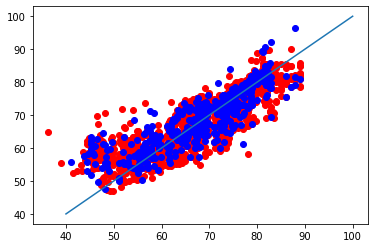

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_hat_train = lin_model.predict(X_train)
y_hat_test = lin_model.predict(X_test)
plt.scatter(y_train, y_hat_train, color = 'r')
plt.scatter(y_test, y_hat_test, color = 'b')
plt.plot([40, 100], [40, 100])
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

In [14]:
print('Mean squared error:', mean_squared_error(y_train, y_hat_train))

Mean squared error: 23.346590801774543


In [15]:
X.shape

(2306, 84)

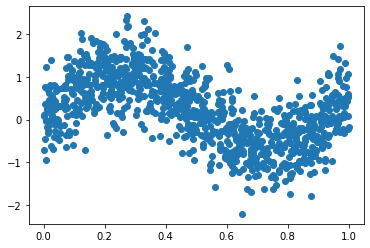

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')

plt.scatter(df['x'], df['y'])

In [18]:
from sklearn.preprocessing import PolynomialFeatures
X = df['x'].to_numpy()
y = df['y'].to_numpy()
X = X.reshape(-1,1) # 입력을 2차원 벡터가 되게 한다. shape = (m, 1)
feature_cubic = PolynomialFeatures(degree = 3)
X_3 = feature_cubic.fit_transform(X)

In [24]:
feature_cubic

PolynomialFeatures(degree=3)

In [25]:
lin_model = LinearRegression()
domain = np.linspace(0, 1, 100).reshape(-1, 1) # 입력은 2차원 벡터로 변형

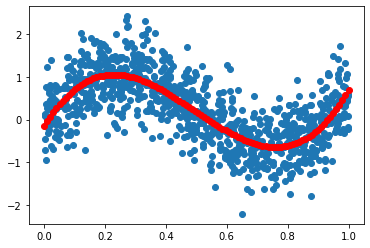

In [26]:
lin_model.fit(X_3, y)
domain_3 = feature_cubic.fit_transform(domain)
predictions = lin_model.predict(domain_3)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, predictions, color = 'r')

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [29]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth = 3)
dec_tree.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [30]:
from sklearn.tree import export_graphviz
export_graphviz(
    dec_tree,
    out_file=("./dec_tree_for_iris.dot"),
    feature_names = iris.feature_names,
)

!ls

dec_tree_for_iris.dot  sample_data


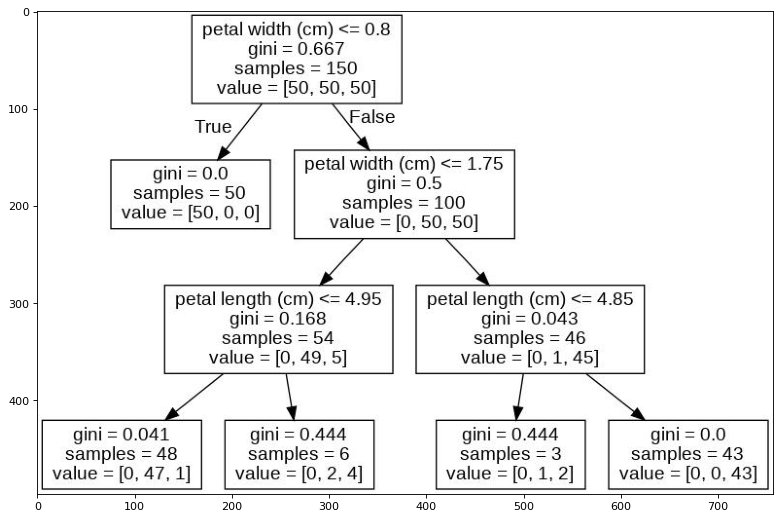

In [31]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12,8), dpi=80,
           facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

In [32]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X,y = iris.data[:,:2], iris.target
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [36]:
from sklearn.tree import export_graphviz
export_graphviz(
    dec_tree,
    out_file=("./dec_tree_for_iris.dot"),
    feature_names=iris.feature_names[:2],
)

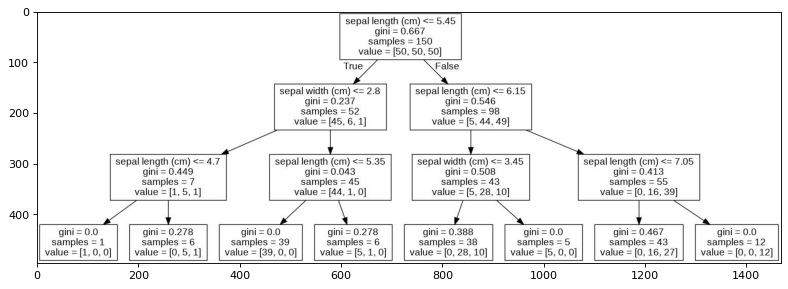

In [38]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12,8), dpi=80,
           facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

In [39]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X, y = iris.data, iris.target
dec_tree = DecisionTreeClassifier(max_depth=3, criterion='entropy')
dec_tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [40]:
from sklearn.tree import export_graphviz
export_graphviz(
    dec_tree,
    out_file=("./dec_tree_for_iris.dot"),
    feature_names=iris.feature_names,
)

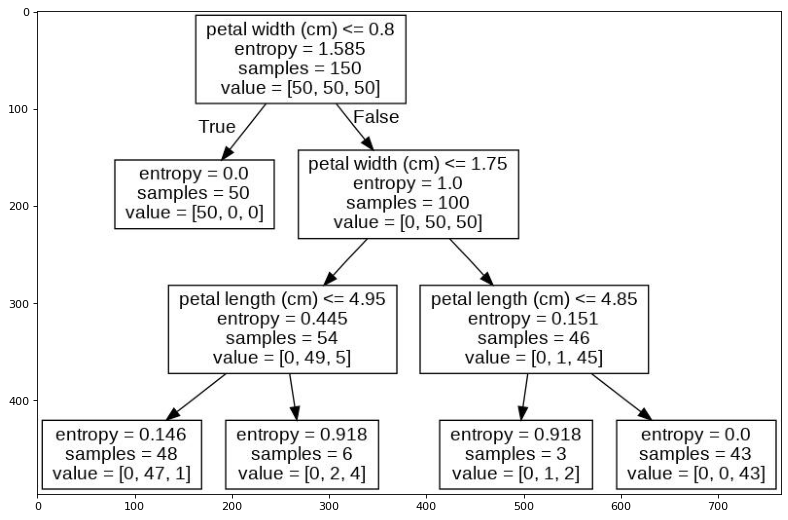

In [41]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12,8), dpi=80,
           facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

In [42]:
import pandas as pd
import numpy as np
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'two_classes.csv')
df.tail(5)

,x1,x2,y
995,2.664896,-1.955326,0
996,-2.019928,0.334542,1
997,-4.634470,0.300158,1
998,1.426275,-2.765590,0
999,1.988053,1.466494,0


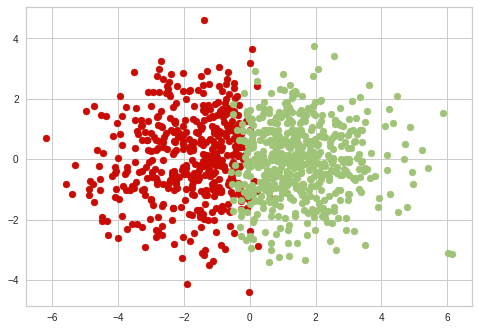

In [48]:
df_positive = df[df['y']>0] # y가 1인 데이터만 추출
df_negative = df[df['y']==0] # y가 0인 데이터만 추출
import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

In [49]:
from sklearn.svm import LinearSVC
X = df[['x1', 'x2']].to_numpy() # x1,x2를 입력 벡터로 한다.
y = df['y'] # y열의 값이 레이블
svm_simple = LinearSVC(C=1, loss='hinge') # SVM 클래스 생성
svm_simple.fit(X,y) # 입력과 레이블로 SVM 학습 실시

LinearSVC(C=1, loss='hinge')

In [50]:
svm_simple.predict([[0.12, 0.56], [-4, 40], [0, 40], [5, 20]])

array([0, 1, 1, 0])

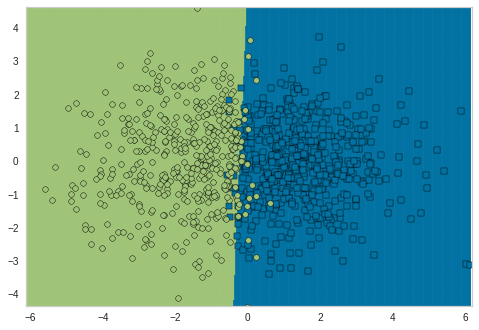

In [53]:
from yellowbrick.contrib.classifier import DecisionViz
viz = DecisionViz(svm_simple, title="linear SVM")
viz.fit(X, y)
viz.draw(X, y)

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm_std = Pipeline([  # 파이프라인으로 SVM 객체 구성
                    ("std", StandardScaler()), # 데이터 표준화 단계 포함
                    ("lsvm", LinearSVC(C=1, loss='hinge')), # 선형 SVM 분류기 포함
])
svm_std.fit(X, y)

Pipeline(steps=[('std', StandardScaler()),
                ('lsvm', LinearSVC(C=1, loss='hinge'))])

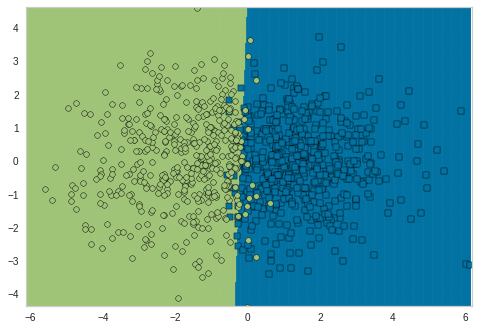

In [57]:
from yellowbrick.contrib.classifier import DecisionViz
viz = DecisionViz(svm_std, title="Standardization - SVM")
viz.fit(X, y)
viz.draw(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


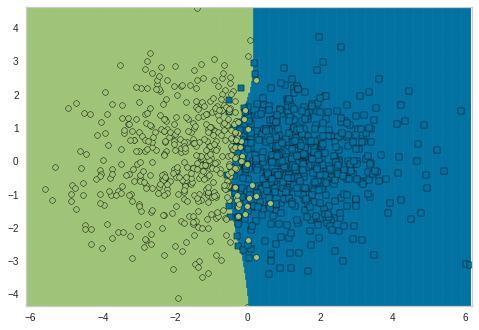

In [61]:
from sklearn.preprocessing import PolynomialFeatures
svm_poly = Pipeline([
                     ("std", StandardScaler()),
                     ("poly_inputs", PolynomialFeatures(degree=5)),
                     ("lsmv", LinearSVC(C=0.01, loss="hinge")),
])
svm_poly.fit(X, y)
viz = DecisionViz(svm_poly, title="polynomial feature SVM")
viz.fit(X, y)
viz.draw(X, y)

In [62]:
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'twisted_data.csv')
print(df.tail(5))

           x1        x2  y
995  1.112475 -0.180790  0
996 -2.544258 -0.559755  0
997 -1.044663  0.164435  1
998 -1.475026 -0.683385  0
999  1.860988  0.728986  1


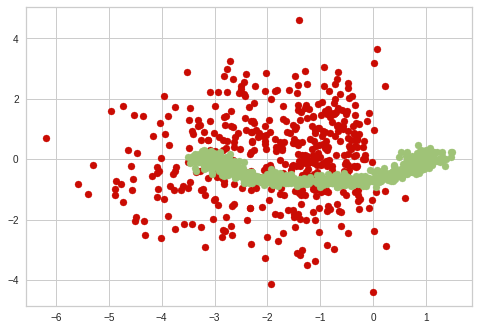

In [64]:
df_positive - df[df['y']>0]
df_negative = df[df['y']==0]

import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

In [65]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from yellowbrick.contrib.classifier import DecisionViz
X = df[['x1', 'x2']].to_numpy()
y = df['y']

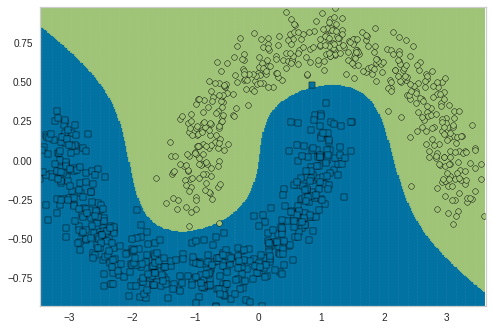

In [66]:
polynomial_svm_clf = Pipeline([
                               ("scaler", StandardScaler()),
                               ("poly_features", PolynomialFeatures(degree=5)),
                               ("svm_clf", LinearSVC(C=1, loss="hinge"))
])
polynomial_svm_clf.fit(X, y)
viz = DecisionViz(polynomial_svm_clf, title = "polynomial feature SVM")
viz.fit(X, y)
viz.draw(X, y)

In [1]:
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'twisted_data.csv')

from sklearn.svm import SVC # 커널 트릭을 사용할 수 있는 SVM 분류기
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from yellowbrick.contrib.classifier import DecisionViz

X = df[['x1', 'x2']].to_numpy()
y = df['y']

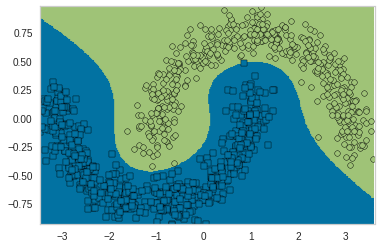

In [2]:
polynomial_svm_clf = Pipeline([
  ("scaler", StandardScaler()),
  ("svm_clf", SVC(C=10, kernel = 'poly', degree = 4, coef0=2))
])
polynomial_svm_clf.fit(X, y)
viz = DecisionViz(polynomial_svm_clf, title="polynomial feature SVM")
viz.fit(X,y)
viz.draw(X, y)